### Boston House Prices dataset 

The boston dataset was first published in 1978 in a paper [Hedonic Housing Prices and the Demand for Clean Air ](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf) by Harrison and Rubenfield.  506 entries represent aggregated data about 14 features for homes in Boston and capture the Crime rate (CRIM), number of Rooms(RM), age(AGE) of owners and more. This dataset is widely used in many machine learning papers that address regression problems.

#### Aims of this notebook:

1. Use **descriptive statistics** and plots to describe the Boston House Prices dataset. 
2. Use **inferential statistics** to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your findings within the notebook. 
3. Use **keras** to create a neural network that can predict the median house price based on the other variables in the dataset.

### Libraries used in this project

In [63]:
import numpy as np
import pandas as pd
# plots
import seaborn as sns
import matplotlib.pyplot as plt
# for creating folder for plots
import os
from random import random
# statistical analysis
import researchpy as rp
import statsmodels.api as sm
#for interactive widgets for charts
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# machine learning
import keras as kr
from keras.models import Sequential
from keras.layers import Dense
#from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [66]:
# importing the boston housing dataset
from sklearn.datasets import load_boston
boston_df = load_boston()

## Exploring the data

In [67]:
# print the keys in the dataset
print(boston_df.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


To learn more about this dataset you can print the description

In [68]:
# DESC should tell us what the data is about
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [69]:
# the feature name contain the columns of the dataset
print(boston_df.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


From inspecting the boston_df.filename, we can see that feature_names should be the columns and boston_df.data should be the rows

In [70]:
# create a new dataset called Boston using the feature_names as the columns
boston = pd.DataFrame(boston_df.data, columns=boston_df.feature_names)
# We are missing one column (MEDV). According to DESCR, Median Value (attribute 14) is usually the target.
boston['MEDV'] = boston_df.target

# Median value of owner-occupied homes in $1000's 
boston['MEDV'] = (boston['MEDV']*1000)

# glance at the data
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0


#### Date cleaning
This is important for the machine learning part of the project
- Check for null values, df.isnull().sum(). Luckily there is no null values in the dataset
- Check for duplicates

There are 16 duplicates for MEDV of 50000.0. We need to remove them as they will throw off the predictions later in the project.

In [71]:
boston = (boston[boston.MEDV != 50000.0])

## Part 1. Descriptive Statistics
Use **descriptive statistics** and plots to describe the Boston House Prices dataset.

Here we can quickly see the mean, standard deviation, min, max and various percentiles for the dataset.

In [72]:
# describe() gives us a quick overview of the dataset
summary = boston.describe()
summary = summary.transpose()
summary.round(2)

,count,mean,std,min,25%,50%,75%,max
CRIM,490.0,3.64,8.72,0.01,0.08,0.25,3.65,88.98
ZN,490.0,11.11,22.84,0.00,0.00,0.00,12.50,100.00
INDUS,490.0,11.11,6.82,0.74,5.19,9.69,18.10,27.74
CHAS,490.0,0.06,0.24,0.00,0.00,0.00,0.00,1.00
NOX,490.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,490.0,6.25,0.65,3.56,5.88,6.18,6.58,8.78
AGE,490.0,68.28,28.16,2.90,44.55,76.80,93.88,100.00
DIS,490.0,3.83,2.11,1.14,2.11,3.28,5.21,12.13
RAD,490.0,9.51,8.69,1.00,4.00,5.00,24.00,24.00
TAX,490.0,408.00,168.07,187.00,280.25,330.00,666.00,711.00


In [73]:
prices = boston['MEDV']
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print( "Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:
Minimum price: $5,000.00
Maximum price: $48,800.00
Mean price: $21,635.92
Median price $20,900.00
Standard deviation of prices: $7,857.27


In [74]:
if not os.path.exists("plots/box"):
    os.makedirs("plots/box")

# random color for each plot     
import random
df_color = sns.color_palette("husl")
random.choice(df_color)

   
@interact

def box_plt(feature = list(boston.columns)):
    for i, value in enumerate(boston):
        sns.boxplot(boston[feature], orient="v", color=random.choice(df_color))
        plt.savefig("plots/box/box_" + str(i) + ".png")
       

interactive(children=(Dropdown(description='feature', options=('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AG…

While researching this topic, I read this blog post:[Analysis of the Boston Housing Prices Dataset](https://rpubs.com/joelrudinas03/BostonHousingPrices) by Joel Jr Ffc Rudinas in R which uses a mixed correlation matrix to quickly investigate relationships between the variables. After looking for ways to do this in Python, I settled on the correlation heatmap using Seaborn:

- **Positive Correlation**: both variables change in the same direction (light color).

- **Neutral Correlation**: No relationship in the change of the variables.

- **Negative Correlation**: variables change in opposite directions (dark color).

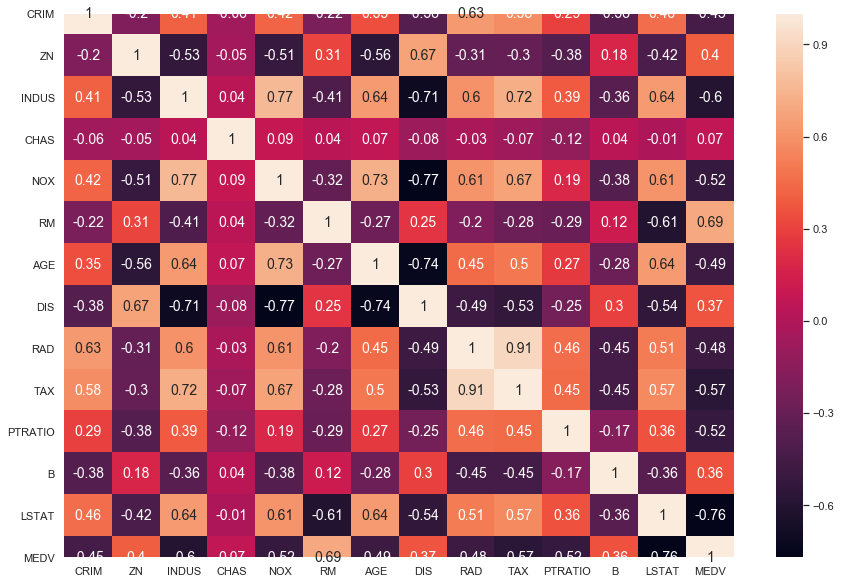

In [75]:
# using a correlation heatmap, we can quickly get a sense for any relationships between the dataset. The darkest and lightest squares show variables which have a strong relationship. 
plt.figure(figsize=(15, 10))
cmap=sns.cubehelix_palette(50, light=0.95, dark=0.15)

# rounding to 2 decimal places and increasing the font size
sns.heatmap(data=boston.corr().round(2), annot=True, annot_kws={"size":14})
#plt.tight_layout()

#save the plot
plt.savefig('plots/bostondatasetcorrelation.png')

# show plot
plt.show()


### Findings the correlation heatmap

- We can see a positive correlation between MEDV and RM at 0.69. When the average number of rooms increase the price of the house also increases.
- Negative correlation between MEDV and LSTAT (% lower status of the population): -0.76
- Negative correlation between MEDV and PTRatio (pupil-teacher ratio by town): (-0.52)
- Negative correlation between MEDV and INDUS (proportion of non-retail business acres per town) (-0.6)

Let's plot these to see more details:

In [76]:
sns.set(style="whitegrid",  rc={'figure.figsize':(11.7,8.27)})

df= boston[['RM','LSTAT','CRIM','INDUS','PTRATIO', 'MEDV']]

#create a folder to add the plots to
if not os.path.exists("plots/linearregression/"):
    os.makedirs("plots/linearregression/")

# random color from palette for each plot    
import random
df_color = sns.color_palette("husl")
random.choice(df_color)    
    
@interact
def scatter_plot(feature=list(df.select_dtypes('number').columns)):
    
    for i, col in enumerate(df):
       sns.regplot(x=feature, y='MEDV', data=df, color=random.choice(df_color))
       plt.savefig("plots/linearregression/linearreg_" + str(i) + ".png")
   


interactive(children=(Dropdown(description='feature', options=('RM', 'LSTAT', 'CRIM', 'INDUS', 'PTRATIO', 'MED…

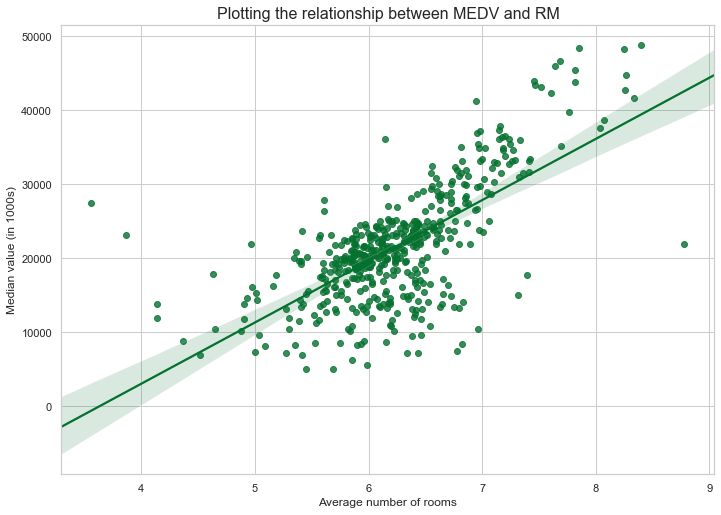

In [77]:
sns.set(style="whitegrid", palette="BuGn_r", rc={'figure.figsize':(11.7,8.27)})

#sns.scatterplot(x='RM', y='MEDV', data=boston)
sns.regplot(x='RM', y='MEDV', data=boston)
title="Plotting the relationship between MEDV and RM"

# Set x-axis label
plt.xlabel('Average number of rooms')
# Set y-axis label
plt.ylabel('Median value (in 1000s)')

# increasing font size
plt.title(title, fontsize=16)

#save the plot
plt.savefig('plots/medvvrmrelationship.png')

# Show the plot
plt.show()

From the correlation heatmap, we can we a negative correlation between MEDV and LSTAT at -0.74. When the % of lower status of the populations increases the value of houses decrease.

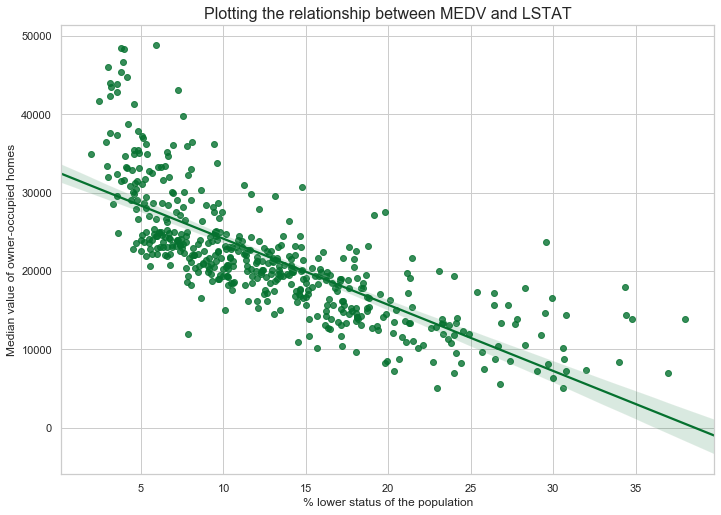

In [78]:
sns.set(style="whitegrid", palette="BuGn_r", rc={'figure.figsize':(11.7,8.27)})


sns.regplot(x='LSTAT', y='MEDV', data=boston)
title="Plotting the relationship between MEDV and LSTAT"

# increasing font size
plt.title(title, fontsize=16)

# Set x-axis label
plt.xlabel('% lower status of the population')
# Set y-axis label
plt.ylabel('Median value of owner-occupied homes')

#save the plot
plt.savefig('plots/medvandlstatrelationship.png')

# Show the plot
plt.show()

# Part 2. Inferential Statistics

Use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. Using [researchpy](https://pypi.org/project/researchpy/) we can quickly get the summary statistics.

In [79]:
# Gettin summary statistics of MEDV for the population
rp.summary_cont(boston['MEDV'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,MEDV,490.0,21635.918367,7865.301063,355.318083,20937.779775,22334.05696


In [80]:
# let's look at the data grouped by whether they bound the River or otherwise.
rp.summary_cont(boston['MEDV'].groupby(boston['CHAS']))

,N,Mean,SD,SE,95% Conf.,Interval
CHAS,,,,,,
0.0,461,21488.503254,7898.848164,367.886036,20766.663292,22210.343215
1.0,29,23979.310345,7024.161328,1304.354013,21377.524579,26581.096111


From the above summary we can see that the houses bound the river have a higher mean MEDV. 

### Let's visualise this in a boxplot

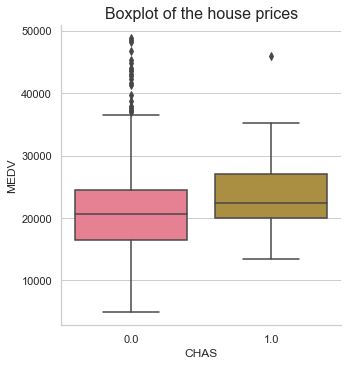

In [81]:
# styling of the plot
sns.set(style="whitegrid", palette="husl", rc={'figure.figsize':(11.7,8.27)})

# https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot(x='CHAS', y='MEDV', kind="box", data=boston)

# plot title
title="Boxplot of the house prices"

# increasing font size
plt.title(title, fontsize=16)

#save the plot
plt.savefig('plots/boxplot.png')

plt.show()

### Creating two new dataframes based on the variable chase

In [82]:
# beside the river
riverhouse_df = boston[boston['CHAS']==1.0]
# not river bound
other_df = boston[boston['CHAS']==0.0]

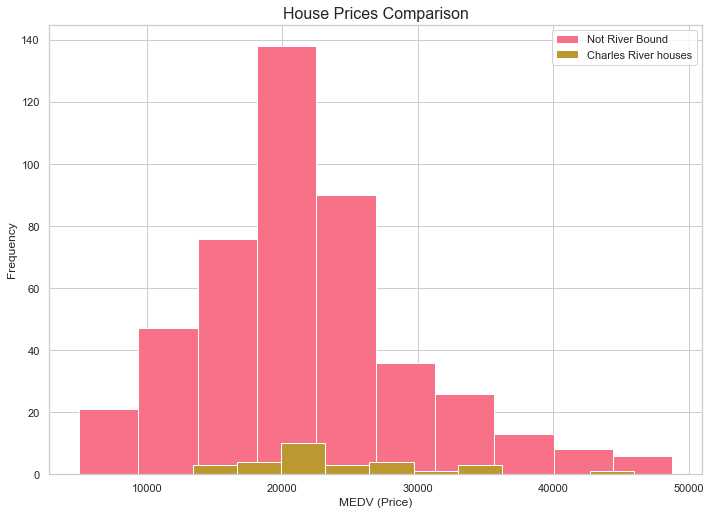

In [83]:
import matplotlib.pyplot as plt

# plot title
title="House Prices Comparison"

# increasing font size
plt.title(title, fontsize=16)

plt.hist(other_df['MEDV'], label='Not River Bound')
plt.hist(riverhouse_df['MEDV'], label='Charles River houses')

# Set x-axis label
plt.xlabel('MEDV (Price)')
# Set y-axis label
plt.ylabel('Frequency')
# legend
plt.legend()

# save plot
plt.savefig('plots/hist.png')

plt.show()

### T-Test

In [94]:
descriptives, results = rp.ttest(other_df['MEDV'], riverhouse_df['MEDV'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,MEDV,461.0,21488.503254,7898.848164,367.886036,20765.557728,22211.448780
1,MEDV,29.0,23979.310345,7024.161328,1304.354013,21307.462269,26651.158421
2,combined,490.0,21635.918367,7865.301063,355.318083,20937.779775,22334.056960


In [95]:
results

,Independent t-test,results
0,Difference (MEDV - MEDV) =,-2490.8071
1,Degrees of freedom =,488.0000
2,t =,-1.6571
3,Two side test p value =,0.0981
4,Difference > 0 p value =,0.0491
5,Difference < 0 p value =,0.9509
6,Cohen's d =,-0.3172
7,Hedge's g =,-0.3168
8,Glass's delta =,-0.3153
9,r =,0.0748


Results: According to the pvalue which is greater than 0.05, there is no stastistical significance. 
Prior to removing the duplicates, the results were showing a pvalue less than 0.05. 

# 3. Predict

Use keras to create a neural network that can predict the median house price based on the other variables in the dataset.

The target variable, 'MEDV', will be the variable we seek to predict.

https://towardsdatascience.com/how-do-we-train-neural-networks-edd985562b73

https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

https://tensorflow.rstudio.com/keras/articles/tutorial_basic_regression.html
https://cran.r-project.org/web/packages/keras/vignettes/getting_started.html

In [26]:
# first neural network with keras tutorial
#importing libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

## Ways to Detect and Remove the Outliers
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

http://colingorrie.github.io/outlier-detection.html

The first thing to get right is to ensure the input layer has the right number of input features. I will only take what I consider the interesting features which had a strong correlation with MEDV. 

In [27]:
#input features (X) 
#inputs = boston.iloc[:, 0:13]
# only take the features that have a strong correlation of MEDV
features = boston[['RM', 'LSTAT', 'PTRATIO', 'INDUS']]
#train_X = boston.drop(columns=['MEDV'])
# What we want to predict
#train_y = boston.iloc[:,13]
prices = boston[['MEDV']]

### Normalising the data
A best practices I came across when researching Neural Networks was to normalise the data to see better results. 

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#features= pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features= scaler.fit_transform(features)
prices= prices.values.reshape(-1,1)
#prices = pd.DataFrame(scaler.fit_transform(prices), columns=prices.columns)
prices = scaler.fit_transform(prices)


### Create train and test split

In [29]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.33, random_state=10)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [30]:
# checking, it should be divided in to 80% train, 20% test
print(features.shape[0])
print("Train:", float(X_train.shape[0]) / float(features.shape[0]))
print("Test:", float(X_test.shape[0]) / float(features.shape[0]))

490
Train: 0.6693877551020408
Test: 0.3306122448979592


As this a regression problem, the loss function we use is mean squared error and the metrics against which we evaluate the performance of the model is mean absolute error and accuracy. Also the output layer should be linear also.

In [96]:
from keras.callbacks import ModelCheckpoint
m = kr.models.Sequential()

n_cols = X_train.shape[1]
# The Input Layer :
m.add(kr.layers.Dense(128, kernel_initializer='normal',input_shape=(n_cols,), activation='relu'))
# The Hidden Layers :
#m.add(kr.layers.Dense(256, kernel_initializer='normal',activation='relu'))
m.add(kr.layers.Dense(256, kernel_initializer='normal',activation='relu'))
m.add(kr.layers.Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
m.add(kr.layers.Dense(1, kernel_initializer='normal',activation='linear'))


# Compile the network :
m.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'accuracy'])
print(m.summary())

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

hist = m.fit(X_train, y_train, epochs=100, batch_size=6, validation_data=(X_test,y_test), callbacks=callbacks_list)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
None
Train on 328 samples, validate on 162 samples
Epoch 1/100
328/328 [==============================] - 1s 4ms/step - loss: 0.1707 - mean_absolute_error: 0.1707 - accuracy: 0.0030 - val_loss: 0.1178 - val_mean_absolute_error: 0.1178 - val_accurac

328/328 [==============================] - 0s 984us/step - loss: 0.0610 - mean_absolute_error: 0.0610 - accuracy: 0.0061 - val_loss: 0.0566 - val_mean_absolute_error: 0.0566 - val_accuracy: 0.0062

Epoch 00028: val_accuracy did not improve from 0.00617
Epoch 29/100
328/328 [==============================] - 0s 979us/step - loss: 0.0621 - mean_absolute_error: 0.0621 - accuracy: 0.0061 - val_loss: 0.0587 - val_mean_absolute_error: 0.0587 - val_accuracy: 0.0062

Epoch 00029: val_accuracy did not improve from 0.00617
Epoch 30/100
328/328 [==============================] - 0s 950us/step - loss: 0.0613 - mean_absolute_error: 0.0613 - accuracy: 0.0061 - val_loss: 0.0540 - val_mean_absolute_error: 0.0540 - val_accuracy: 0.0062

Epoch 00030: val_accuracy did not improve from 0.00617
Epoch 31/100
328/328 [==============================] - 0s 966us/step - loss: 0.0574 - mean_absolute_error: 0.0574 - accuracy: 0.0061 - val_loss: 0.0602 - val_mean_absolute_error: 0.0602 - val_accuracy: 0.0062

Epoc

328/328 [==============================] - 0s 1ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - accuracy: 0.0061 - val_loss: 0.0486 - val_mean_absolute_error: 0.0486 - val_accuracy: 0.0062

Epoch 00059: val_accuracy did not improve from 0.00617
Epoch 60/100
328/328 [==============================] - 0s 1ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - accuracy: 0.0061 - val_loss: 0.0496 - val_mean_absolute_error: 0.0496 - val_accuracy: 0.0062

Epoch 00060: val_accuracy did not improve from 0.00617
Epoch 61/100
328/328 [==============================] - 0s 1ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - accuracy: 0.0061 - val_loss: 0.0557 - val_mean_absolute_error: 0.0557 - val_accuracy: 0.0062

Epoch 00061: val_accuracy did not improve from 0.00617
Epoch 62/100
328/328 [==============================] - 0s 999us/step - loss: 0.0582 - mean_absolute_error: 0.0582 - accuracy: 0.0061 - val_loss: 0.0712 - val_mean_absolute_error: 0.0712 - val_accuracy: 0.0062

Epoch 0006

328/328 [==============================] - 0s 997us/step - loss: 0.0507 - mean_absolute_error: 0.0507 - accuracy: 0.0061 - val_loss: 0.0541 - val_mean_absolute_error: 0.0541 - val_accuracy: 0.0062

Epoch 00090: val_accuracy did not improve from 0.00617
Epoch 91/100
328/328 [==============================] - 0s 993us/step - loss: 0.0563 - mean_absolute_error: 0.0563 - accuracy: 0.0061 - val_loss: 0.0491 - val_mean_absolute_error: 0.0491 - val_accuracy: 0.0062

Epoch 00091: val_accuracy did not improve from 0.00617
Epoch 92/100
328/328 [==============================] - 0s 992us/step - loss: 0.0521 - mean_absolute_error: 0.0521 - accuracy: 0.0061 - val_loss: 0.0550 - val_mean_absolute_error: 0.0550 - val_accuracy: 0.0062

Epoch 00092: val_accuracy did not improve from 0.00617
Epoch 93/100
328/328 [==============================] - 0s 992us/step - loss: 0.0617 - mean_absolute_error: 0.0617 - accuracy: 0.0061 - val_loss: 0.0602 - val_mean_absolute_error: 0.0602 - val_accuracy: 0.0062

Epoc

In [97]:
results=m.fit(X_train,y_train)

Epoch 1/1
328/328 [==============================] - 0s 202us/step - loss: 0.0498 - mean_absolute_error: 0.0498 - accuracy: 0.0061


In [98]:
print(score)

NameError: name 'score' is not defined

In [99]:
#print(m.metrics_names)
score = m.evaluate(X_test, y_test, verbose = 0)
print("Loss:", score[0])
print("mean_absolute_error:", score[1])
print("Test Accuracy:", score[2])
# epoch 100
# Loss: 0.058811152514852125
#mean_absolute_error: 0.05881115421652794
#Test Accuracy: 0.006172839552164078

# epoch 500
# Test Score: 2214.4743403220664
# Test Accuracy: 2214.474609375

# after adding two extra hidden layers
# Test Score: 2549.8913624043366
# Test Accuracy: 2549.891357421875

# epoch 1000
# Test Score: 2241.6360710299746
# Test Accuracy: 2241.635986328125

# before normalise the data
#Test Score: 2326.835857780612
#Test Accuracy: 2326.8359375

# before increasing split from .2 to .33
#Test Score: 0.05484031901067617
#Test Accuracy: 0.0548403225839138

# before increasing split  to .33
# Test Score: 0.04884675402700165
# Test Accuracy: 0.04884675145149231

Loss: 0.058811152514852125
mean_absolute_error: 0.05881115421652794
Test Accuracy: 0.006172839552164078


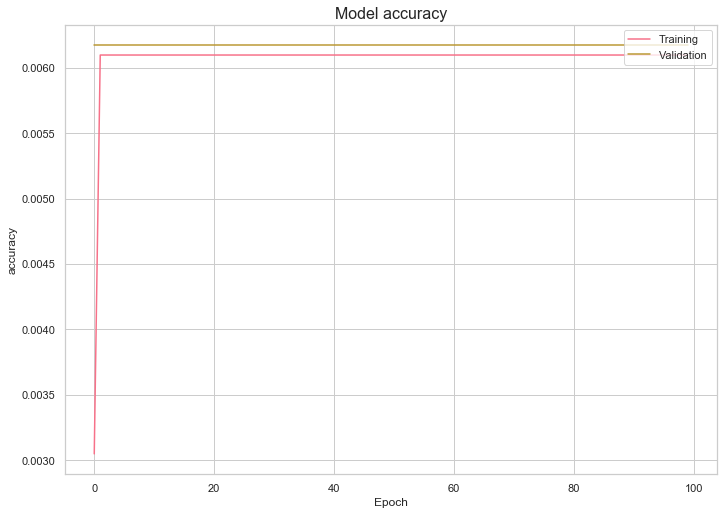

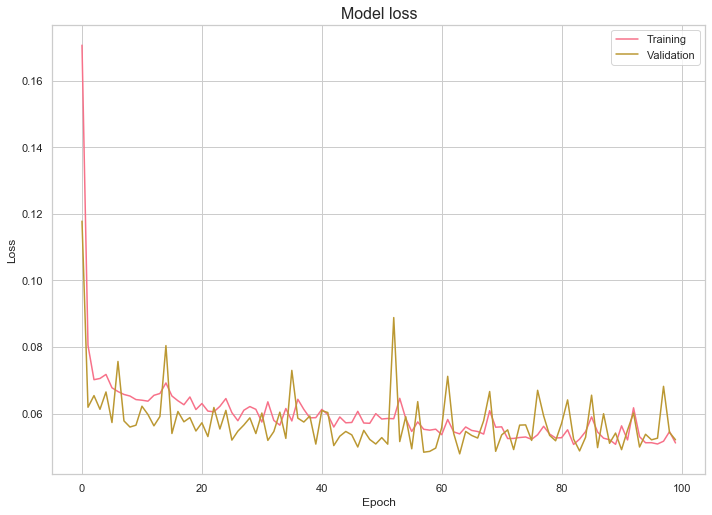

In [100]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="husl", rc={'figure.figsize':(11.7,8.27)})

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy', fontsize=16)

plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss', fontsize=16)
# increasing font size
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [101]:
m.predict(X_test).T

array([[0.22843379, 0.67303205, 0.369547  , 0.33467105, 0.3369704 ,
        0.4379884 , 0.37865013, 0.44760102, 0.5893126 , 0.22400573,
        0.51990944, 0.48515394, 0.3965667 , 0.12961373, 0.26501507,
        0.42511016, 0.4483738 , 0.32430747, 0.23168188, 0.67921036,
        0.37566978, 0.17930043, 0.39292413, 0.7434157 , 0.18894705,
        0.4911528 , 0.35935634, 0.36853632, 0.39549422, 0.09957561,
        0.29395497, 0.3745184 , 0.48066723, 0.35197872, 0.36006492,
        0.8965956 , 0.36809796, 0.33194867, 0.2860888 , 0.4432512 ,
        0.83554846, 0.19343904, 0.8984987 , 0.15815538, 0.28692722,
        0.14039735, 0.5621842 , 0.39078745, 0.3681478 , 0.5117262 ,
        0.2477057 , 0.35008425, 0.353747  , 0.732835  , 0.43834996,
        0.38484752, 0.3758242 , 0.32846949, 0.3937095 , 0.6585645 ,
        0.40711662, 0.71640956, 0.8470976 , 0.31667462, 0.3194842 ,
        0.45245457, 0.33876222, 0.35631686, 0.36760265, 0.5238739 ,
        0.21824613, 0.4196068 , 0.35989407, 0.45

In [102]:
y_test

array([[0.19178082],
       [0.6826484 ],
       [0.23515982],
       [0.25342466],
       [0.26484018],
       [0.26255708],
       [0.41552511],
       [0.4109589 ],
       [0.56849315],
       [0.20776256],
       [0.40639269],
       [0.44977169],
       [0.34931507],
       [0.18949772],
       [0.23744292],
       [0.42922374],
       [0.40182648],
       [0.34246575],
       [0.21232877],
       [0.59817352],
       [0.31050228],
       [0.07762557],
       [0.32191781],
       [0.60958904],
       [0.08675799],
       [0.46118721],
       [0.33105023],
       [0.31278539],
       [0.33333333],
       [0.12557078],
       [0.21004566],
       [0.34474886],
       [0.44748858],
       [0.2739726 ],
       [0.33333333],
       [0.98858447],
       [0.38127854],
       [0.35159817],
       [0.24200913],
       [0.38812785],
       [0.88584475],
       [0.1347032 ],
       [0.9086758 ],
       [0.12557078],
       [0.26027397],
       [0.18493151],
       [0.43150685],
       [0.429

In [103]:
#m.evaluate(X_test, y_test)
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = m.evaluate(X_test, y_test, batch_size=8)
print('test loss, test acc:', results)


# Evaluate on test data
162/162 [==============================] - 0s 175us/step
test loss, test acc: [0.05881115233088717, 0.05881115421652794, 0.006172839552164078]


In [104]:
# fit the model to the training data
y_pred = m.predict(X_test)

Let’s plot the predicted value against the actual value. The black broken line is the predicted values

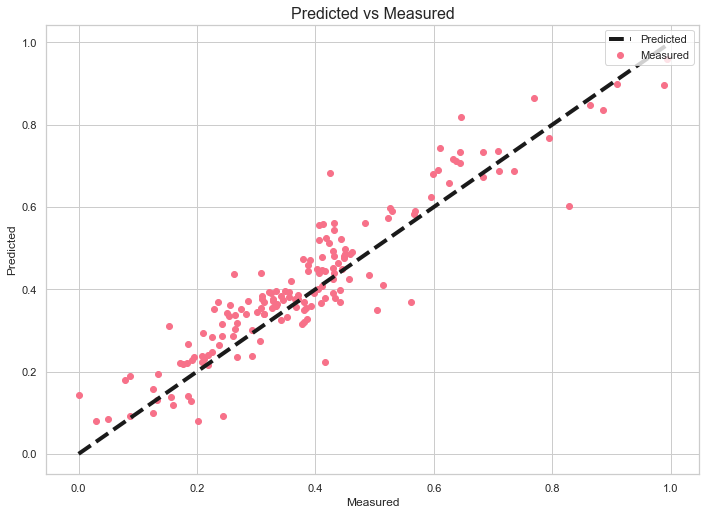

In [105]:
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="husl", rc={'figure.figsize':(11.7,8.27)})

#fig, ax = plt.subplots()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.legend(['Predicted', 'Measured'], loc='upper right')

title="Predicted vs Measured"

# increasing font size
plt.title(title, fontsize=16)

plt.show()

In [106]:
predictions = m.predict(X_test)
predictions_labels = scaler.inverse_transform(predictions)
#predictions_labels = scaler.inverse_transform(predictions)
predictions_labels

array([[15005.4  ],
       [34478.805],
       [21186.16 ],
       [19658.592],
       [19759.303],
       [24183.89 ],
       [21584.877],
       [24604.924],
       [30811.893],
       [14811.451],
       [27772.033],
       [26249.744],
       [22369.621],
       [10677.081],
       [16607.66 ],
       [23619.824],
       [24638.771],
       [19204.668],
       [15147.667],
       [34749.414],
       [21454.336],
       [12853.359],
       [22210.076],
       [37561.61 ],
       [13275.882],
       [26512.492],
       [20739.809],
       [21141.89 ],
       [22322.646],
       [ 9361.411],
       [17875.229],
       [21403.906],
       [26053.225],
       [20416.668],
       [20770.844],
       [44270.89 ],
       [21122.691],
       [19539.352],
       [17530.69 ],
       [24414.402],
       [41597.023],
       [13472.63 ],
       [44354.242],
       [11927.206],
       [17567.412],
       [11149.404],
       [29623.668],
       [22116.49 ],
       [21124.873],
       [27413.607],


### Evaluate

In [107]:
predictions_labels == scaler.inverse_transform(y_test)

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [108]:
# how many are correct
(predictions_labels == scaler.inverse_transform(y_test)).sum()

0

### Ref:
https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

### inferential statistics
https://www.datavedas.com/inferential-statistics-in-python/
https://en.wikipedia.org/wiki/P-value

## Correlation
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

https://rpubs.com/joelrudinas03/BostonHousingPrices

https://realpython.com/linear-regression-in-python/

# Neural Network
https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-regression-ceee5a9eadff


https://towardsdatascience.com/how-do-we-train-neural-networks-edd985562b73

https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

https://tensorflow.rstudio.com/keras/articles/tutorial_basic_regression.html
https://cran.r-project.org/web/packages/keras/vignettes/getting_started.html

https://olegleyz.github.io/boston_housing.html

In [43]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(m.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 3 arrays: [array([[ 5],
       [17],
       [15]]), array([[ 4],
       [32],
       [22]]), array([[ 8],
       [ 3],
       [12]])]...